# Can I download the entire TRILEGAL set for all OpSim fields? 

This would significantly speed up the runs on Quest, if I could just have a database to read from!

In [7]:
import pandas as pd
import numpy as np

import sys
import os
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code/vespa_update')
from vespa_update import trilegal as trilegal_update
from TRILEGAL import TRILEGAL
from OpSim import OpSim

print(os.environ['PATH'])

/Volumes/highnoon2go/highnoon/WORK/LSST/onGitHub/EBLSST/testing/TRILEGAL/vespa_update:/Users/ageller/anaconda3/bin:/Users/ageller/anaconda3/condabin:/Users/ageller/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/share/dotnet:/opt/X11/bin:~/.dotnet/tools:/Library/Frameworks/Mono.framework/Versions/Current/Commands


In [3]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/baseline2018a.db'
OpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


In [ ]:
#server was too busy when I tried to run this (maybe because I'm running models on Quest?).  I need to test this!
head = pd.read_csv('outputFilesHead.csv')
Nmax = 5e5 #maximum number of stars that we want from TRILEGAL
area0 = np.pi*(3.5/2.)**2. #square degrees (LSST FoV)

for i in range(len(OpS.Nobs)):
    if (OpS.Nobs[i] > 0):

        galaxy = TRILEGAL()
        galaxy.RA = OpS.RA[i]
        galaxy.Dec = OpS.Dec[i]
        galaxy.fieldID = OpS.fieldID[i]
        galaxy.tmpfname = 'TRILEGAL_model_fID_'+str(int(OpS.fieldID[i]))+'.h5'
        galaxy.tmpdir = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/'
        if (not os.path.exists(os.path.join(galaxy.tmpdir, galaxy.tmpfname))):
            #find the number of expected stars
            #reduce the area if needed so that we don't download more that Nmax stars
            headVal = head.loc[(head['OpSimID'] == OpS.fieldID[i])]
            if (len(headVal.index) > 0):
                print("expected Nstars = ",headVal['NstarsTRILEGAL'][0])
                if (headVal['NstarsTRILEGAL'][0] > Nmax):
                    galaxy.area = area0*Nmax/headVal['NstarsTRILEGAL'][0]
            else:
                print('dont have OpSim field in header ', OpS.fieldID[i], len(headVal.index))

            galaxy.downloadModel()
        else:
            print(galaxy.tmpfname, "already exists")


expected Nstars =  200116.0
downloading model  TRILEGAL_model_fID_1.h5 9.62112750161874


In [11]:


from astropy.coordinates import SkyCoord
from astropy import units, constants

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_hdf('grid/test.trilegal.GC.h5')
df2 = pd.read_hdf('grid/test.trilegal.GC.rband.h5')

In [7]:
area = 0.

with pd.HDFStore('grid/test.trilegal.GC.h5') as store:
    attrs = store.get_storer('df').attrs
    print(attrs.trilegal_args)
with pd.HDFStore('grid/test.trilegal.GC.rband.h5') as store:
    attrs = store.get_storer('df').attrs
    if ('area' in attrs.trilegal_args):
        area = float(attrs.trilegal_args['area'])
    print(attrs.trilegal_args)
print(area)

{'version': '1.6', 'ra': 270.0, 'dec': -29, 'l': 1.5439368675677592, 'b': -2.741151563920792, 'area': 0.1, 'AV': 2.227, 'sigma_AV': 0.1, 'filterset': 'lsst', 'maglim': 26, 'binaries': False}
{'version': '1.6', 'ra': 270.0, 'dec': -29.0, 'l': 1.5439368675677592, 'b': -2.741151563920792, 'area': 0.01, 'AV': 2.227, 'sigma_AV': 0.1, 'filterset': 'lsst', 'maglim': 26, 'maglimFilter': 3, 'binaries': False}
0.01


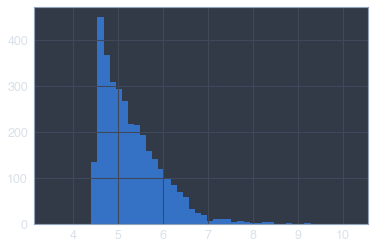

In [10]:
df = pd.read_csv('outputFilesHead.csv')
use = df.loc[(df['NstarsTRILEGAL'] > 0)]
f,ax = plt.subplots()
_ = ax.hist(np.log10(use['NstarsTRILEGAL']), bins=50)

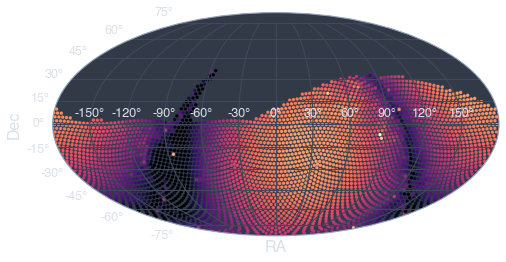

In [15]:
coords = SkyCoord(use['OpSimRA'], use['OpSimDec'], unit=(units.degree, units.degree),frame='icrs')	
lGal = coords.galactic.l.wrap_at(180.*units.degree).degree
bGal = coords.galactic.b.wrap_at(180.*units.degree).degree
RAwrap = coords.ra.wrap_at(180.*units.degree).degree
Decwrap = coords.dec.wrap_at(180.*units.degree).degree

f, ax = plt.subplots(subplot_kw={'projection': "mollweide"}, figsize=(8,5))
ax.grid(True)
ax.set_xlabel("RA",fontsize=16)
ax.set_ylabel("Dec",fontsize=16)
mlw = ax.scatter(np.array(RAwrap).ravel()*np.pi/180., np.array(Decwrap).ravel()*np.pi/180., c=np.log10(use['NstarsTRILEGAL']), cmap='magma_r', s = 10, vmin=4, vmax=6.5)

In [4]:
filename = 'TRILEGAL_model_fID_0.h5'
df = pd.read_hdf('grid/TRILEGAL_model_fID_0.h5')
df2

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,u_mag,g_mag,r_mag,i_mag,z_mag,Y_mag,Mact
0,1,6.65,-0.17,1.11528,0.120,3.789,4.466,14.2,2.513,0.0,18.670,23.877,21.869,20.754,20.201,19.804,19.588,1.115
1,1,6.65,-0.15,0.52645,-1.290,3.611,4.838,15.2,2.347,0.0,23.195,30.743,27.452,25.597,24.649,24.023,23.676,0.526
2,1,6.65,-0.13,2.36050,1.537,4.033,4.351,13.9,2.184,0.0,14.826,19.167,17.663,17.264,17.101,16.921,16.791,2.361
3,1,6.71,-0.05,0.53449,-1.291,3.607,4.830,13.8,1.913,0.0,21.798,28.750,25.595,23.864,22.970,22.398,22.082,0.534
4,1,6.71,0.21,0.36649,-1.742,3.564,4.946,14.0,2.220,0.0,23.126,31.342,27.874,25.980,24.654,23.853,23.452,0.366
5,1,6.71,0.25,0.31255,-1.890,3.554,4.983,11.3,1.438,0.0,20.794,28.018,24.717,23.026,21.816,21.124,20.792,0.313
6,1,6.77,0.15,0.15333,-1.723,3.498,4.283,13.0,2.221,0.0,22.078,31.668,27.752,25.706,23.908,22.878,22.389,0.153
7,1,6.81,0.01,0.33667,-1.808,3.566,4.985,13.8,2.227,0.0,23.091,31.249,27.776,25.864,24.594,23.815,23.425,0.337
8,1,6.81,0.41,0.10242,-1.918,3.480,4.231,11.9,1.663,0.0,21.464,30.652,26.801,24.895,23.032,22.012,21.534,0.102
9,1,6.87,-0.09,0.26821,-1.981,3.560,5.033,13.2,2.371,0.0,22.922,31.473,27.840,25.844,24.536,23.730,23.327,0.268


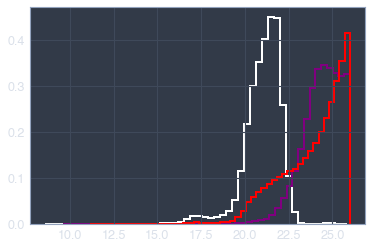

In [9]:
f, ax = plt.subplots()
_ = ax.hist(df['r_mag'], bins=50, histtype='step', color='white', linewidth=2, density=True)
_ = ax.hist(df['u_mag'], bins=50, histtype='step', color='purple', linewidth=2, density=True)
_ = ax.hist(df2['r_mag'], bins=50, histtype='step', color='red', linewidth=2, density=True)
#ax.set_yscale('log')

In [18]:
filename = 'grid/test.trilegal.GC.h5'

dist = np.array([])
logL = np.array([])
Av = np.array([])
RA = np.array([])
Dec = np.array([])
lGal = np.array([])
bGal = np.array([])
RAgrid = [RAIn]#[0]#np.arange(0,360, 1)
Decgrid = [DecIn]#[0]#np.arange(-90, 45, 1)
for r in RAgrid:
    for d in Decgrid:
        print(r,d)
        #filename = 'grid/trilegal.grid.ra'+str(r)+'.dec'+str(d)+'.h5'

        df = pd.read_hdf(filename)
        dist = np.append(dist, np.log10( 10.**(df['m-M0'].values/5.) *10. / 1000.)) #log(d [kpc])
        logL = np.append(logL, df['logL'].values)
        Av = np.append(Av, df['Av'].values)

        ras = np.random.uniform(low=r, high=(r+1.0), size=len(df['Av'].values))
        decs = np.random.uniform(low=d, high=(d+1.0), size=len(df['Av'].values))
        coords = SkyCoord(ras, decs, unit=(u.degree, u.degree),frame='icrs')
        RA = np.append(RA, ras)
        Dec = np.append(Dec, decs)
        lGal = np.append(lGal, coords.galactic.l.wrap_at(180.*u.degree).degree)
        bGal = np.append(bGal, coords.galactic.b.wrap_at(180.*u.degree).degree)


270.0 -29


447912


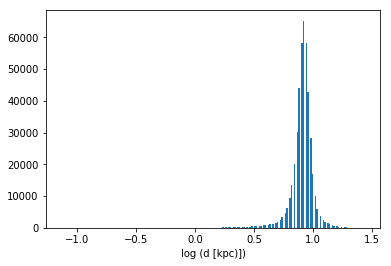

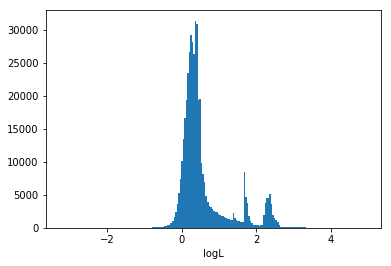

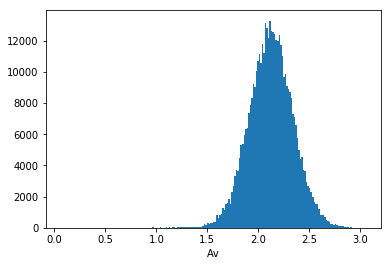

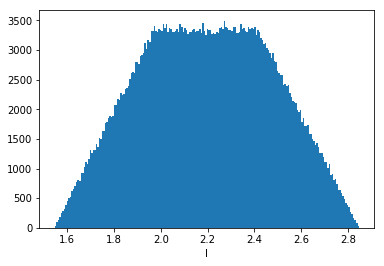

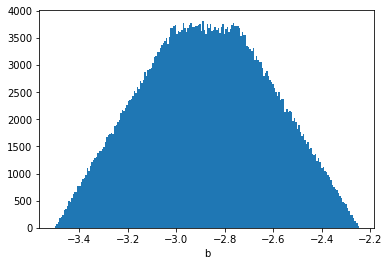

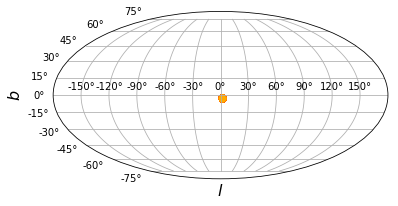

In [19]:
print(len(dist))
#nbins = int(np.floor(len(dist)**0.5))
nbins = 200

f,ax = plt.subplots()
n, bins, patches = ax.hist(dist, bins=nbins)
ax.set_xlabel('log (d [kpc)])')

f,ax = plt.subplots()
n, bins, patches = ax.hist(logL, bins=nbins)
ax.set_xlabel('logL')

f,ax = plt.subplots()
n, bins, patches = ax.hist(Av, bins=nbins)
ax.set_xlabel('Av')

f,ax = plt.subplots()
n, bins, patches = ax.hist(lGal, bins=nbins)
ax.set_xlabel('l')

f,ax = plt.subplots()
n, bins, patches = ax.hist(bGal, bins=nbins)
ax.set_xlabel('b')

f, ax = plt.subplots(subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$l$",fontsize=16)
ax.set_ylabel(r"$b$",fontsize=16)
ax.scatter(lGal*np.pi/180.,bGal*np.pi/180.,c=logL,cmap='autumn',alpha = 0.3)


[-4. -3. -2. -1.  0.  1.  2.]


<IPython.core.display.Javascript object>


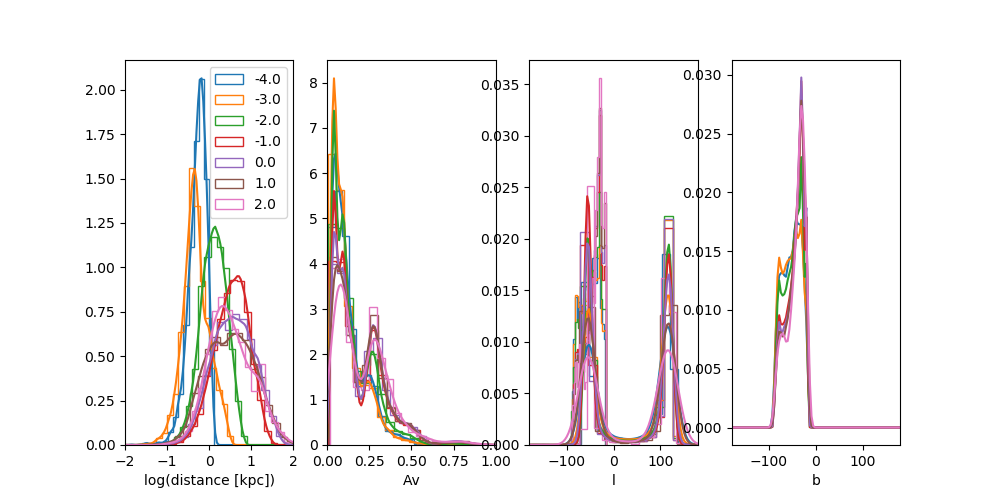

-4.0 3913
-3.0 23022
-2.0 220828
-1.0 232490
0.0 75010
1.0 6343
2.0 1133


<IPython.core.display.Javascript object>


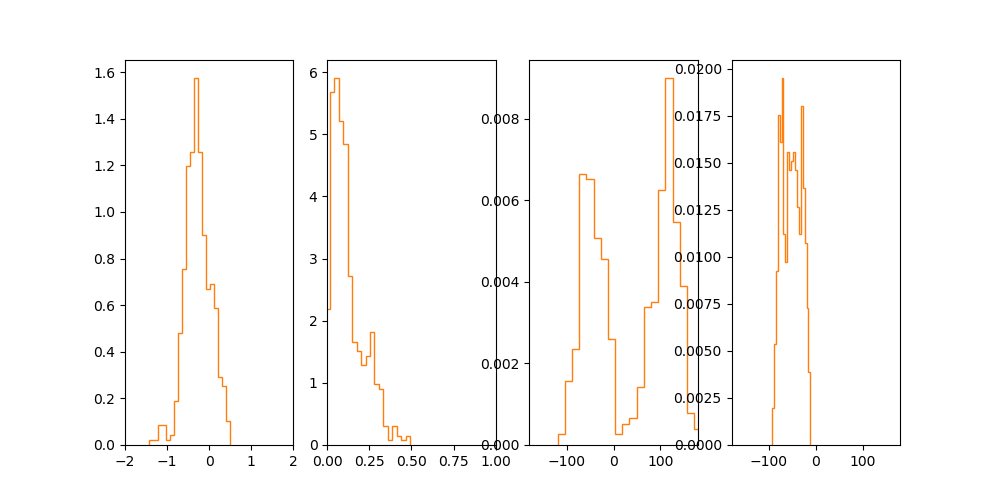

(-180, 180)

In [109]:
#take bins in logL
LbSize = 1.
Lbins = np.arange(-4,3,LbSize)
print(Lbins)

nbins = 20
kernels = {}

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
f,ax = plt.subplots(1,4, figsize=[10,5])
for i,L in enumerate(Lbins):
    inL = np.where(np.logical_and(logL > L, logL < L + LbSize))
    print(L, len(inL[0]))
    
    data = np.vstack((dist[inL], Av[inL], lGal[inL], bGal[inL]))
    KDE = gaussian_kde(data)
    kernels[L] = KDE
    _,_,_ = ax[0].hist(dist[inL], bins=nbins, density=True, histtype='step', color=colors[i], label=str(L))
    KDEd = gaussian_kde(dist[inL])
    grid = np.linspace(-2,2,100)
    ax[0].plot(grid, KDEd(grid), color=colors[i])
    ax[0].set_xlabel('log(distance [kpc])')

    _,_,_ = ax[1].hist(Av[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEa = gaussian_kde(Av[inL])
    grid = np.linspace(0,1,100)
    ax[1].plot(grid, KDEa(grid), color=colors[i])
    ax[1].set_xlabel('Av')

    _,_,_ = ax[2].hist(lGal[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEl = gaussian_kde(lGal[inL])
    grid = np.linspace(-180,180,100)
    ax[2].plot(grid, KDEl(grid), color=colors[i])
    ax[2].set_xlabel('l')
    
    _,_,_ = ax[2].hist(bGal[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEb = gaussian_kde(bGal[inL])
    grid = np.linspace(-180,180,100)
    ax[3].plot(grid, KDEb(grid), color=colors[i])
    ax[3].set_xlabel('b')
ax[0].legend()
ax[0].set_xlim(-2,2)
ax[1].set_xlim(0,1)
ax[2].set_xlim(-180,180)
ax[3].set_xlim(-180,180)

i=1
n = 500
data = kernels[Lbins[i]].resample(size=n)
f,ax = plt.subplots(1,4, figsize=[10,5])
_,_,_ = ax[0].hist(data[0], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[1].hist(data[1], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[2].hist(data[2], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[3].hist(data[3], bins=nbins, histtype='step', density=True, color=colors[i])
ax[0].set_xlim(-2,2)
ax[1].set_xlim(0,1)
ax[2].set_xlim(-180,180)
ax[3].set_xlim(-180,180)
